# VƯỢT QUA SQL: CHUYỂN ĐỔI DỮ LIỆU BẤT ĐỘNG SẢN THÀNH NHỮNG THÔNG TIN HÀNH ĐỘNG VỚI PANDAS

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
pd.set_option('display.max_columns', 4)

## 1. Khám phá dữ liệu với phương thức DataFrame.query() của Pandas

### Lọc các dòng từ DataFrame bằng cách sử dụng phương thức query()

In [6]:
import pandas as pd
from pprint import pprint

# Tải dữ liệu
Ames = pd.read_csv('../data/Ames.csv')

# Truy vấn đơn giản: Chọn các căn nhà có giá bán trên $600,000
high_value_houses = Ames.query('SalePrice > 600000')
pprint(high_value_houses)

            PID  GrLivArea  ...   Latitude  Longitude
65    528164060       2470  ...  42.058475 -93.656810
584   528150070       2364  ...  42.060462 -93.655516
1007  528351010       4316  ...  42.051982 -93.657450
1325  528320060       3627  ...  42.053228 -93.657649
1639  528110020       2674  ...  42.063049 -93.655918

[5 rows x 85 columns]


### Thực hiện truy vấn kết hợp nhiều điều kiện

In [7]:
# Truy vấn nâng cao: Chọn những ngôi nhà có hơn 3 phòng ngủ và giá dưới 300.000 USD
specific_houses = Ames.query('BedroomAbvGr > 3 & SalePrice < 300000')
print(specific_houses)

            PID  GrLivArea  ...   Latitude  Longitude
5     908128060       1922  ...  42.018988 -93.671572
23    902326030       2640  ...  42.029358 -93.612289
33    903400180       1848  ...  42.029544 -93.627377
38    527327050       2030  ...  42.054506 -93.631560
40    528326110       2172  ...  42.055785 -93.651102
...         ...        ...  ...        ...        ...
2539  905101310       1768  ...  42.033393 -93.671295
2557  905107250       1440  ...  42.031349 -93.673578
2562  535101110       1584  ...  42.048256 -93.619860
2575  905402060       1733  ...  42.027669 -93.666138
2576  909275030       2002  ...        NaN        NaN

[352 rows x 85 columns]


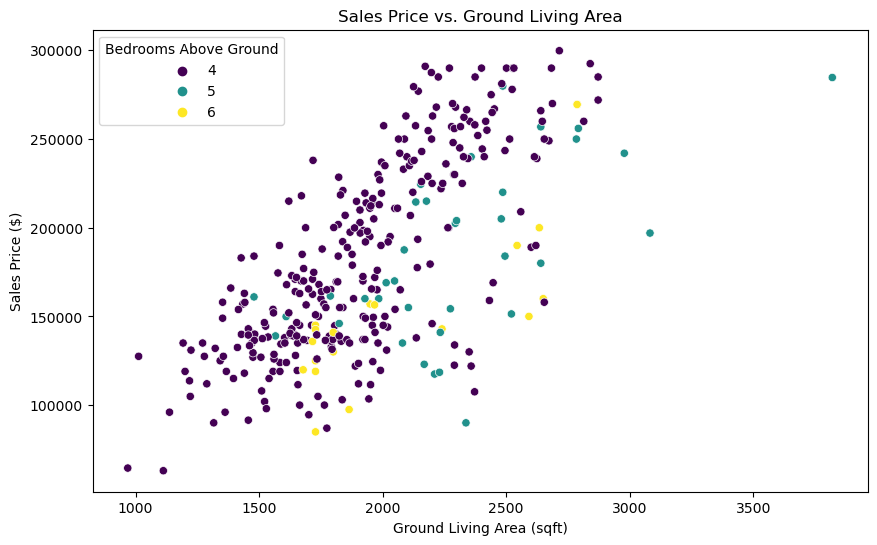

In [3]:
specific_houses = Ames.query('BedroomAbvGr > 3 & SalePrice < 300000')

# Trực quan hóa kết quả truy vấn nâng cao
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='BedroomAbvGr',
                data=specific_houses, palette='viridis')
plt.title('Sales Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sales Price ($)')
plt.legend(title='Bedrooms Above Ground')
plt.savefig("ground_living_area.png", bbox_inches="tight")
plt.show()

In [4]:
# Nhóm theo khu vực lân cận, sau đó tính toán giá trị trung bình, tổng giá bán và số lượng nhà
grouped_data = specific_houses.groupby('Neighborhood').agg({
    'SalePrice': ['mean', 'count']
})

# 'Neighborhood' là chỉ mục, nhưng bạn nên đổi tên các cột để rõ ràng hơn
grouped_data.columns = ['Average Sales Price', 'House Count']

# Làm tròn giá bán trung bình đến hai chữ số thập phân
grouped_data['Average Sales Price'] = grouped_data['Average Sales Price'].round(2)

print(grouped_data)

              Average Sales Price  House Count
Neighborhood                                  
BrDale                  113700.00            1
BrkSide                 154840.00           10
ClearCr                 206756.31           13
CollgCr                 233504.17           12
Crawfor                 199946.68           19
Edwards                 142372.41           29
Gilbert                 222554.74           19
IDOTRR                  146953.85           13
MeadowV                 135966.67            3
Mitchel                 152030.77           13
NAmes                   158835.59           59
NPkVill                 143000.00            1
NWAmes                  203846.28           39
NoRidge                 272222.22           18
NridgHt                 275000.00            3
OldTown                 142586.72           43
SWISU                   147493.33           15
Sawyer                  148375.00           16
SawyerW                 217952.06           16
Somerst      

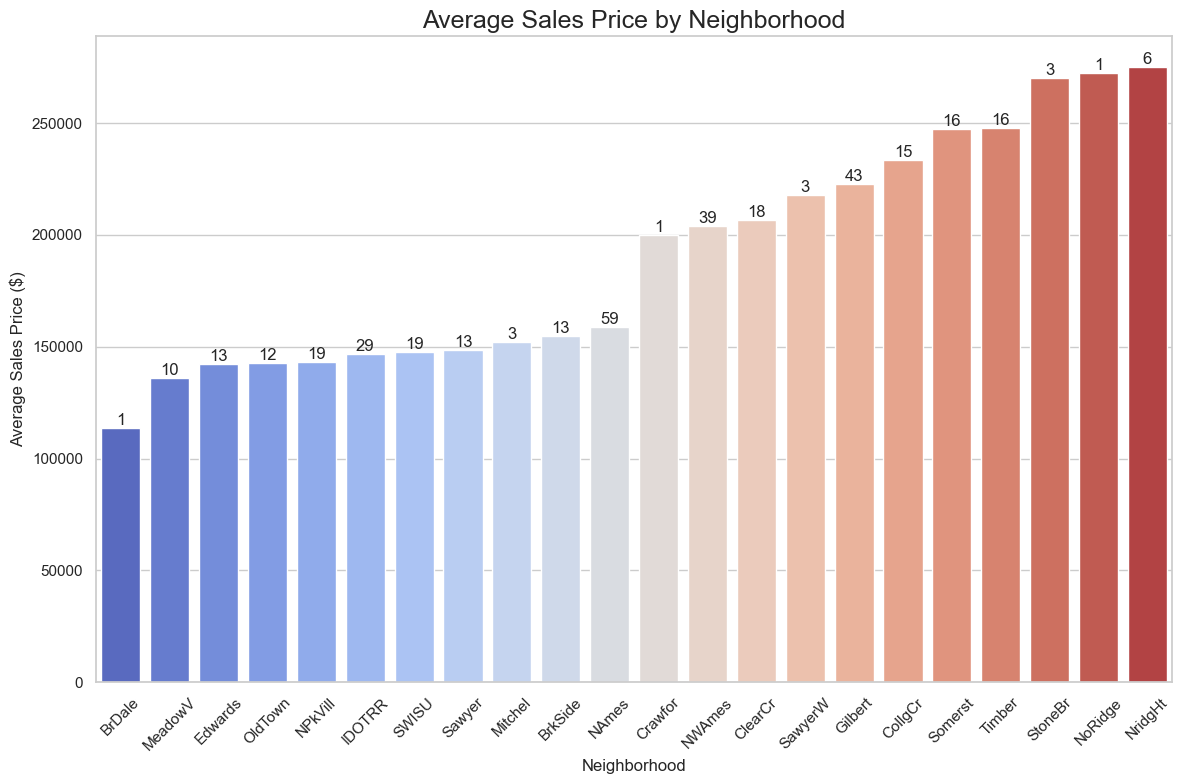

In [13]:
# 'Neighborhood' was index, reset to make it a column then sort by price
grouped_data_reset = grouped_data.reset_index().sort_values(by='Average Sales Price')

# Thiết lập phong cách thẩm mỹ cho biểu đồ
sns.set_theme(style="whitegrid")

# Tạo biểu đồ cột
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Neighborhood',
    y='Average Sales Price',
    data=grouped_data_reset,
    palette="coolwarm",
    hue="Neighborhood",
    dodge=False,
    errorbar=None  # Loại bỏ thanh sai số
)
barplot.legend_.remove()

# Xoay nhãn trên trục x để dễ đọc hơn
plt.xticks(rotation=45)

# Ghi chú số lượng nhà lên từng cột trong biểu đồ
for index, value in enumerate(grouped_data_reset['Average Sales Price']):
    house_count = grouped_data_reset.loc[index, 'House Count']
    plt.text(index, value, f'{house_count}', ha='center', va='bottom')

plt.title('Average Sales Price by Neighborhood', fontsize=18)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sales Price ($)')

plt.tight_layout()  # Điều chỉnh bố cục
plt.savefig("average_sales_price_by_neighborhood.png", bbox_inches="tight")
plt.show()

In [14]:
# This is a list of neighborhoods with higher average sale prices
high_value_neighborhoods = ['NridgHt', 'NoRidge', 'StoneBr']

# Use df.loc[] to select houses in high-value neighborhoods based on your conditions
high_value_houses = Ames.loc[(Ames['BedroomAbvGr'] > 3) &
                             (Ames['SalePrice'] < 300000) &
                             (Ames['Neighborhood'].isin(high_value_neighborhoods)),
                             ['Neighborhood', 'SalePrice', 'GrLivArea']]

print(high_value_houses.head())

    Neighborhood  SalePrice  GrLivArea
40       NoRidge     291000       2172
162      NoRidge     285000       2225
460      NridgHt     250000       2088
468      NoRidge     268000       2295
490      NoRidge     260000       2417


In [15]:
# Filter for houses not in the 'high_value_neighborhoods',
# with at least 3 bedrooms above grade, and priced below $300,000
low_value_spacious = Ames.loc[(~Ames['Neighborhood'].isin(high_value_neighborhoods)) &
                              (Ames['BedroomAbvGr'] >= 3) &
                              (Ames['SalePrice'] < 300000)]

# Sort these houses by 'SalePrice' to highlight the lower end explicitly
low_value_spacious = low_value_spacious.sort_values(by='SalePrice').reset_index(drop=True)

# Using df.iloc to select and print the first 5 observations of such low-value houses
low_value_spacious_first_5 = low_value_spacious.iloc[:5, :]

# Print only relevant columns
print(low_value_spacious_first_5[['Neighborhood', 'SalePrice', 'GrLivArea']])

  Neighborhood  SalePrice  GrLivArea
0       IDOTRR      40000       1317
1       IDOTRR      50000       1484
2       IDOTRR      55000       1092
3       Sawyer      62383        864
4      Edwards      63000       1112


In [16]:
# Filter for houses priced below $300,000 and with at least 1 bedroom above grade
affordable_houses = Ames.query('SalePrice < 300000 & BedroomAbvGr > 0')

# Create pivot table to analyze average sale price by neighborhood and number of bedrooms
pivot_table = affordable_houses.pivot_table(values='SalePrice',
                                            index='Neighborhood',
                                            columns='BedroomAbvGr',
                                            aggfunc='mean').round(2)

# Fill missing values (combination not exist) with 0 to avoid seeing NaN
pivot_table = pivot_table.fillna(0)

# Adjust pandas display options to ensure all columns are shown
pd.set_option('display.max_columns', None)
print(pivot_table)

BedroomAbvGr          1          2          3          4          5          6
Neighborhood                                                                  
Blmngtn       178450.00  197931.19       0.00       0.00       0.00       0.00
Blueste       192500.00  128557.14  151000.00       0.00       0.00       0.00
BrDale             0.00   99700.00  111946.43  113700.00       0.00       0.00
BrkSide        77583.33  108007.89  140058.67  148211.11  214500.00       0.00
ClearCr       212250.00  220237.50  190136.36  209883.20  196333.33       0.00
CollgCr       154890.00  181650.00  196650.98  233504.17       0.00       0.00
Crawfor       289000.00  166345.00  193433.75  198763.94  210000.00       0.00
Edwards        59500.00  117286.27  134660.65  137332.00  191866.67  119900.00
Gilbert            0.00  172000.00  182178.30  223585.56  204000.00       0.00
Greens        193531.25       0.00       0.00       0.00       0.00       0.00
GrnHill            0.00  230000.00       0.00       

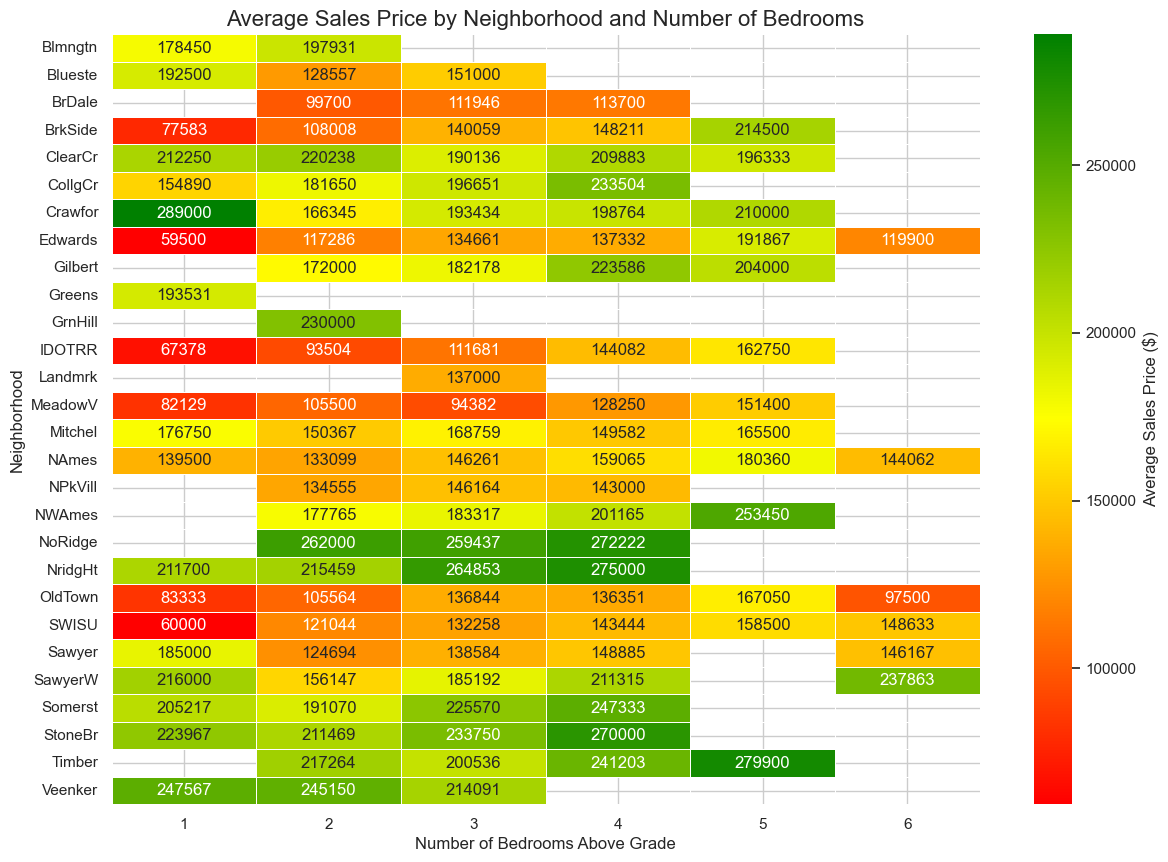

In [18]:
import matplotlib

affordable_houses = Ames.query('SalePrice < 300000 & BedroomAbvGr > 0')
pivot_table = affordable_houses \
              .pivot_table(values='SalePrice', index='Neighborhood',
                           columns='BedroomAbvGr', aggfunc='mean') \
              .round(2) \
              .fillna(0)

# Create a custom color map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Mask for "zero" values to be colored with a different shade
mask = pivot_table == 0

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a heatmap with the mask
sns.heatmap(pivot_table,
            cmap=cmap,
            annot=True,
            fmt=".0f",
            linewidths=.5,
            mask=mask,
            cbar_kws={'label': 'Average Sales Price ($)'})

# Adding title and labels for clarity
plt.title('Average Sales Price by Neighborhood and Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms Above Grade', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Display the heatmap
plt.show()